In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# import requests libraries
import requests
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations using the zip() function.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# 6.1.5 Generate Random World Cities

With our list of random latitudes and longitudes, we'll use the coordinates in our lat_lngs tuple to find the nearest city using Python's citipy module.

Since we haven't worked with the citipy module yet, let's import and test it. Citipy doesn't come with the Anaconda module, so we'll install it in our PythonData environment.

The citypy documentation https://pypi.org/project/citipy/  instructs us to install the citipy module by typing pip install citipy. To complete the installation, follow the instructions for your operating system.

### To install the citipy module on Windows, complete the following steps:

Click the clipboard to copy pip install citipy.

Launch your PythonData Anaconda Prompt. You should see the following:

Python```
(PythonData) C:\Users\your_computer_name>```

Paste pip install citipy and press Enter.

The citipy module will probably take a few minutes to download into your PythonData environment.

To learn how to use citypy, click "Homepage" on the module webpage or see the GitHub citipy repository (Links to an external site.).

Let's import the citipy script and practice using it. In our API_practice file, add a new cell and import the citipy.py script from the citipy module.

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

588

Some of this code should look familiar, but let's break it down:

1. We create a cities list to store city names.
2. We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
3. We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

### Finding
When you run the code block, you should get slightly more than 500 unique cities. If you get fewer than 500, increase your size limit on the np.random.uniform() function.

# 6.2.6 Get the City Weather Data
For this section, we will need to do the following:

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [5]:
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]  
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | cape town
Processing Record 2 of Set 12 | busselton
Processing Record 3 of Set 12 | roura
Processing Record 4 of Set 12 | aksarka
Processing Record 5 of Set 12 | hamilton
Processing Record 6 of Set 12 | mataura
Processing Record 7 of Set 12 | saint-philippe
Processing Record 8 of Set 12 | shimoda
Processing Record 9 of Set 12 | avarua
Processing Record 10 of Set 12 | rudbar
Processing Record 11 of Set 12 | kapaa
Processing Record 12 of Set 12 | tura
Processing Record 13 of Set 12 | ribeira grande
Processing Record 14 of Set 12 | takhtamygda
Processing Record 15 of Set 12 | bluff
Processing Record 16 of Set 12 | puerto ayora
Processing Record 17 of Set 12 | vardo
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 20 of Set 12 | geraldton
Processing Record 21 of Set 12 | butte
Processing Record 22 of Set 12 | ellisr

Processing Record 32 of Set 15 | miri
Processing Record 33 of Set 15 | saryshagan
City not found. Skipping...
Processing Record 34 of Set 15 | ondjiva
Processing Record 35 of Set 15 | kemin
Processing Record 36 of Set 15 | sakakah
Processing Record 37 of Set 15 | taoudenni
Processing Record 38 of Set 15 | falun
Processing Record 39 of Set 15 | champerico
Processing Record 40 of Set 15 | apatou
Processing Record 41 of Set 15 | itupiranga
Processing Record 42 of Set 15 | warri
Processing Record 43 of Set 15 | saint-augustin
Processing Record 44 of Set 15 | ostrovnoy
Processing Record 45 of Set 15 | dauriya
Processing Record 46 of Set 15 | lavrentiya
Processing Record 47 of Set 15 | mehamn
Processing Record 48 of Set 15 | puerto madryn
Processing Record 49 of Set 15 | khatanga
Processing Record 50 of Set 15 | port blair
Processing Record 1 of Set 16 | haines junction
Processing Record 2 of Set 16 | kytlym
City not found. Skipping...
Processing Record 3 of Set 16 | tessalit
Processing Reco

Processing Record 16 of Set 19 | salta
Processing Record 17 of Set 19 | coihaique
Processing Record 18 of Set 19 | kalmunai
Processing Record 19 of Set 19 | raudeberg
Processing Record 20 of Set 19 | kaitangata
Processing Record 21 of Set 19 | hovd
Processing Record 22 of Set 19 | el tigre
Processing Record 23 of Set 19 | tasiilaq
Processing Record 24 of Set 19 | airai
Processing Record 25 of Set 19 | bilibino
Processing Record 26 of Set 19 | chicama
Processing Record 27 of Set 19 | mahina
Processing Record 28 of Set 19 | iracoubo
Processing Record 29 of Set 19 | bethel
Processing Record 30 of Set 19 | tiksi
Processing Record 31 of Set 19 | bafq
Processing Record 32 of Set 19 | bubaque
Processing Record 33 of Set 19 | khani
Processing Record 34 of Set 19 | vega de alatorre
Processing Record 35 of Set 19 | dunn
Processing Record 36 of Set 19 | outjo
Processing Record 37 of Set 19 | waterloo
Processing Record 38 of Set 19 | san lazaro
Processing Record 39 of Set 19 | amderma
City not fou

Processing Record 4 of Set 23 | maceio
Processing Record 5 of Set 23 | yanan
City not found. Skipping...
Processing Record 6 of Set 23 | eyl
Processing Record 7 of Set 23 | puerto leguizamo
Processing Record 8 of Set 23 | port hedland
Processing Record 9 of Set 23 | nioki
Processing Record 10 of Set 23 | pueblo
Processing Record 11 of Set 23 | lompoc
Processing Record 12 of Set 23 | itaqui
Processing Record 13 of Set 23 | chifeng
Processing Record 14 of Set 23 | kindersley
Processing Record 15 of Set 23 | kisangani
Processing Record 16 of Set 23 | chardara
Processing Record 17 of Set 23 | galyugayevskaya
Processing Record 18 of Set 23 | cairns
Processing Record 19 of Set 23 | ust-kamchatsk
City not found. Skipping...
Processing Record 20 of Set 23 | la libertad
Processing Record 21 of Set 23 | mogochin
City not found. Skipping...
Processing Record 22 of Set 23 | yaroslavskaya
Processing Record 23 of Set 23 | watsa
Processing Record 24 of Set 23 | san juan
Processing Record 25 of Set 23

# 6.2.7 Create a Dataframe of City Weather Data

Recall that we can convert a list of dictionaries to a Pandas DataFrame using ```df = pd.DataFrame(list with dictionaries)```.

In [7]:
city_count = len(city_data)
city_count

537

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cape Town,30,ZA,2022-07-13 04:02:33,82,-33.9258,18.4232,55.38,5.99
1,Busselton,5,AU,2022-07-13 04:02:45,59,-33.6500,115.3333,60.73,9.35
2,Roura,100,GF,2022-07-13 04:02:46,89,4.7263,-52.3274,79.97,4.61
3,Aksarka,100,RU,2022-07-13 04:02:46,92,66.5606,67.7975,53.46,8.10
4,Hamilton,0,US,2022-07-13 04:02:47,75,39.1834,-84.5333,72.88,0.00


Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

```new_column_order = ["column2", "column4", "column1"]```

Then, we assign a new or the same DataFrame with new column order:

```df = df[new_column_order]```

In [11]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#call the new df
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-07-13 04:02:33,-33.9258,18.4232,55.38,82,30,5.99
1,Busselton,AU,2022-07-13 04:02:45,-33.6500,115.3333,60.73,59,5,9.35
2,Roura,GF,2022-07-13 04:02:46,4.7263,-52.3274,79.97,89,100,4.61
3,Aksarka,RU,2022-07-13 04:02:46,66.5606,67.7975,53.46,92,100,8.10
4,Hamilton,US,2022-07-13 04:02:47,39.1834,-84.5333,72.88,75,0,0.00
5,Mataura,NZ,2022-07-13 04:02:47,-46.1927,168.8643,44.47,98,100,7.67
6,Saint-Philippe,RE,2022-07-13 04:02:48,-21.3585,55.7679,67.59,75,38,11.77
7,Shimoda,JP,2022-07-13 04:02:48,34.6667,138.9500,75.11,85,64,5.08
8,Avarua,CK,2022-07-13 04:02:48,-21.2078,-159.7750,75.25,78,40,9.22
9,Rudbar,AF,2022-07-13 04:02:49,30.1500,62.6000,88.52,18,0,17.58


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

# 6.3.1 Plot Latitude vs. Temperature
We are going to create a series of scatter plots for each weather parameter against the latitude for all the cities.

We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed. The first is latitude vs. maximum temperature.

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

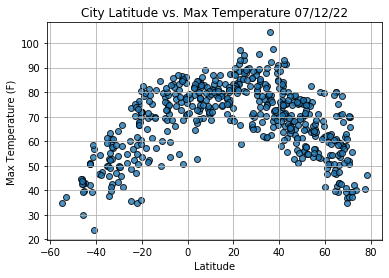

In [17]:
#create a scatter plot that plots latitude vs. maximum temperature
#x_axis_title = "Latitude"
#y_axis_title = "Max Temperature (F)"
#Title = "City Latitutde vs. Max Temperature 08/09/19"
#plt.scatter()
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

The balance of the scatter plots will share the same format. All we need to do is change the y-axis variable for each weather parameter. Let's create the scatter plots quickly by copying the code and changing the y-axis variable.

# 6.3.2. Plot Latitude Vs. Humidity

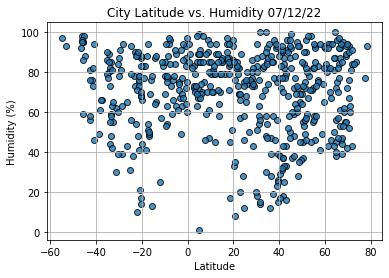

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3. Plot Latitude vs Cloudiness

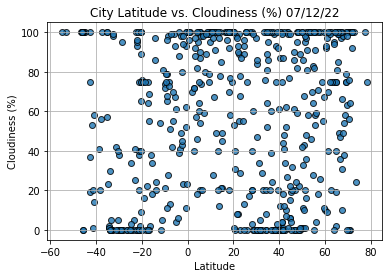

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

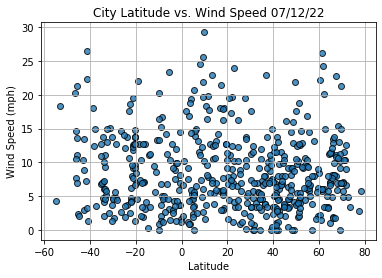

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.2. Find the Linear Regression Between Latitude and Max Temp
Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like what we have used before.

We will reuse this code with minor changes for each weather parameter in each hemisphere. The variables for each graph are as follows:

The x values, the latitudes
The y values, each of the four weather parameters
The y label, the weather parameter being plotted
The x- and y-values given as a tuple, (10,40), for the regression line equation to be placed on the scatter plot.
With only four small changes to the code, this is a great time to convert our linear regression calculation and plotting to a function! In the function, we can add these four parameters as variables, and when we call the function, pass values to those variables.

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames
We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame.

In [27]:
index13 = city_data_df.loc[13]
index13

City                  Takhtamygda
Country                        RU
Date          2022-07-13 04:02:51
Lat                          54.1
Lng                       123.567
Max Temp                    63.86
Humidity                       98
Cloudiness                    100
Wind Speed                   4.41
Name: 13, dtype: object

We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

In [28]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
5      False
6      False
7       True
8      False
9       True
10      True
11      True
12      True
13      True
14     False
15     False
16      True
17     False
18     False
19      True
20     False
21      True
22     False
23      True
24      True
25      True
26      True
27      True
28     False
29      True
       ...  
507    False
508    False
509    False
510     True
511     True
512    False
513     True
514     True
515     True
516     True
517     True
518    False
519    False
520     True
521     True
522    False
523     True
524    False
525     True
526     True
527     True
528    False
529     True
530     True
531    False
532     True
533     True
534     True
535    False
536    False
Name: Lat, Length: 537, dtype: bool

If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Roura,GF,2022-07-13 04:02:46,4.7263,-52.3274,79.97,89,100,4.61
3,Aksarka,RU,2022-07-13 04:02:46,66.5606,67.7975,53.46,92,100,8.10
4,Hamilton,US,2022-07-13 04:02:47,39.1834,-84.5333,72.88,75,0,0.00
7,Shimoda,JP,2022-07-13 04:02:48,34.6667,138.9500,75.11,85,64,5.08
9,Rudbar,AF,2022-07-13 04:02:49,30.1500,62.6000,88.52,18,0,17.58


Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.

To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

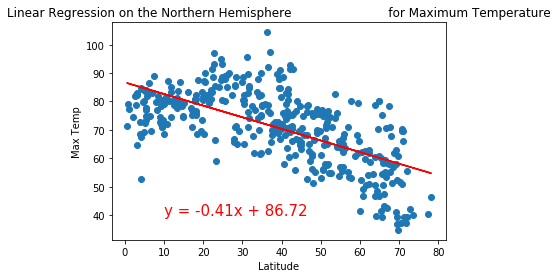

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere
Now we can generate linear regression on the maximum temperature for the Southern Hemisphere.
To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.

Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

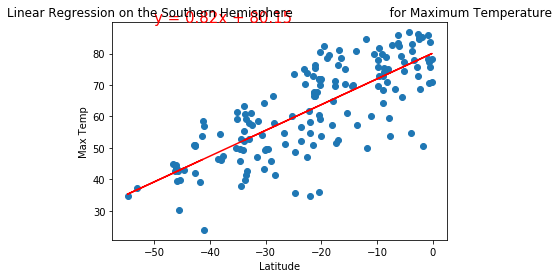

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

# Finding
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

# 6.4.3 Find the Correlation Between Latitude and % Humidity
To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.

Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

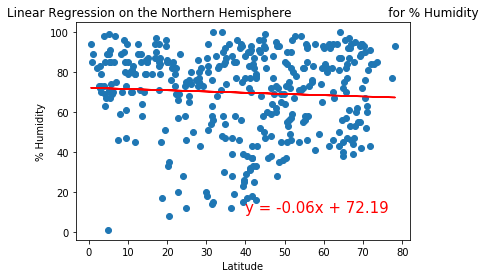

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere
Next, we will perform linear regression on the percent humidity and latitudes for the Southern Hemisphere.

For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, set the x-value equal to the latitude column and y-value equal to the humidity column from the southern_hemi_df DataFrame.

Call the plot_linear_regression function, with the x-and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

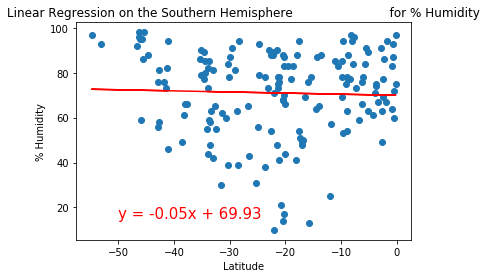

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

# Finding
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

# 6.4.4. Finding the Correlation Between Latitude and Percent Cloudiness
Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  

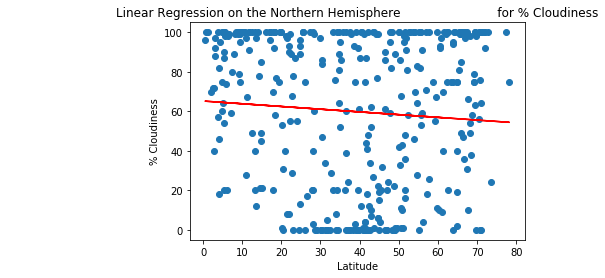

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere
Now we'll create the linear regression line and plot for percent cloudiness in the Southern Hemisphere.

Generate the x-value equal to the latitude column and the y-value equal to the cloudiness column from the southern_hemi_df DataFrame. Call the plot_linear_regression function. Be sure to edit the title, y_label, and text_coordinates for the percent cloudiness scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

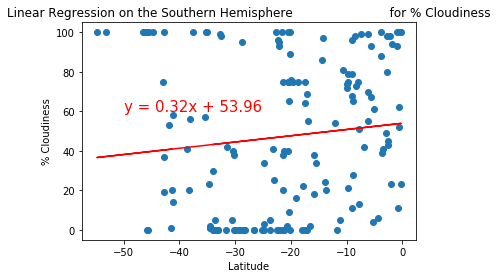

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

# Finding
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# 6.4.5 Finding the Correlation Between Latitude and Wind Speed
Perform Linear Regression on the Wind Speed for the Northern Hemisphere
Call the plot_linear_regression function, with the x-value equal to the Latitude column and the y-value equal to the Wind Speed column from the northern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the wind speed scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

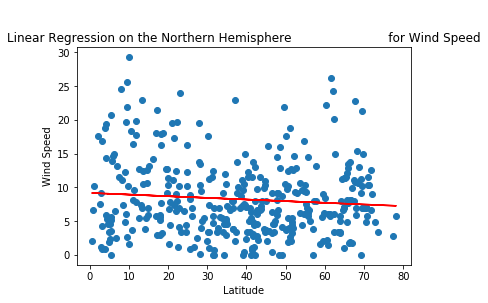

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

###Perform Linear Regression on the Wind Speed for the Southern Hemisphere
Finally, let's call the plot_linear_regression function, with the x-value equal to the latitude column and the y-value equal to wind speed column from the southern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the wind speed scatter plot.

Add the code to a new cell and run it to generate the linear regression and plot the data.

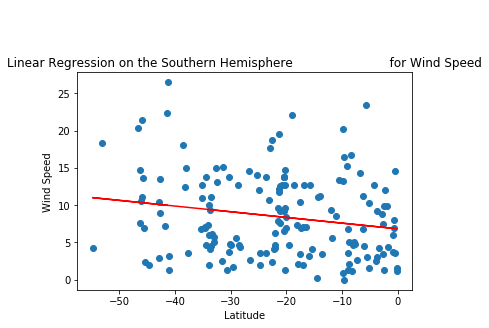

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

# Finding
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 

# 6.5.2 Create Heatmaps for Weather Parameters
For a basic heatmap, all we need to do is provide the following:

Latitudes and longitudes for the locations
A measurement value for each latitude and longitude in the form of arrays that have the same number of items in each array
Begin by importing our dependencies and Google API key, and then add our cities.csv file to a DataFrame. Create a new Jupyter Notebook file named VacationPy.ipynb. In the first cell, add our dependencies and API key.

In [1]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

Let's review how we will use our dependencies. We'll use Pandas to read our CSV file and create the locations and measurements from the DataFrame. We'll use gmaps and the API key to create heatmaps and the locations map, and we'll use the requests dependency to make a request to the Google Places JSON file. This will allow us to get hotel locations from the latitude and longitude of the city.

Next, we'll read our cities.csv file into a DataFrame. Add the following code and run it to create the DataFrame.

In [2]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Cape Town,ZA,2022-07-13 04:02:33,-33.9258,18.4232,55.38,82,30,5.99
1,1,Busselton,AU,2022-07-13 04:02:45,-33.6500,115.3333,60.73,59,5,9.35
2,2,Roura,GF,2022-07-13 04:02:46,4.7263,-52.3274,79.97,89,100,4.61
3,3,Aksarka,RU,2022-07-13 04:02:46,66.5606,67.7975,53.46,92,100,8.10
4,4,Hamilton,US,2022-07-13 04:02:47,39.1834,-84.5333,72.88,75,0,0.00


One caveat to using gmaps: The data we use for any mapping must be either an integer or a floating-point decimal number. Let's check the data types for the columns of our DataFrame.

REWIND
Recall that you use the dtypes method to get the data types of a DataFrame.

Confirm the data types for the data columns are integers or floating-point decimal numbers.



In [3]:
# get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

### Create a Maximum Temperature Heatmap
First, tell gmaps to use your API key. You only need to configure gmaps to use your API key once.
Add the following code to a new cell and run the cell.

In [4]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

### create a heatmap for maximum temperature:
1. Assign the locations to an array of latitude and longitude pairs.
```locations = [latitude, longitude]```
2. Assign the weights variable to some values.
```temperatures = # an array of length equal to the locations array length```
3. Assign the figure variable to the gmaps.figure() attribute.
```fig = gmaps.figure()```
4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
```heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)```
5. Add the heatmap layer.
```fig.add_layer(heatmap_layer)```
6. Call the figure to plot the data.
```fig```

In [5]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [6]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Create a Percent Humidity Heatmap
Now that we have created our maximum temperature heatmap, let's create the heatmap for humidity. We can reuse the code and use the humidity values for the measurements.

Add the following code to a new cell and run the cell.

In [7]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Create a Percent Cloudiness Heatmap
Next, we will create the heatmap for percent cloudiness.
To create the heatmap for percent cloudiness, replace the measurement from the humidity values to cloudiness values. Copy the code that created the previous heatmap and edit your code with the line clouds = city_data_df["Cloudiness"] so that the percent cloudiness replaces the percent humidity, and set the variable weights=clouds, and run your cell.

Your percent cloudiness heatmap should look like the following.

In [8]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

### Create a Wind Speed Heatmap
Now we can create the final heatmap. Copy the code that created the previous heatmap and edit your code with the line wind = city_data_df["Wind Speed"] so that the wind speed replaces the percent cloudiness, and set the variable weights=wind, and run your cell.

Your wind speed heatmap should look similar to the following.

In [9]:
# Heatmap of Wind Speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# 6.5.3 Get Vacation Criteria
For the app we are creating, we need to prompt the user to enter the minimum and maximum temperature ranges as floating-point decimal numbers to filter the city_data_df DataFrame.

REWIND
Recall that you use the input() statement to prompt a user to enter information. To convert the input to a floating-point decimal number, wrap the input() statement with the float() method, like this: float(input()).

In a new cell, we'll write two input statements for the app that will prompt the customer to add minimum and maximum temperature values and convert these values to floating-point decimals.

The statement can be whatever you want it to be, but for our app, we'll prompt the customer with the following two input statements.

In [10]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


Next, filter the maximum temperature column in the city_data_df DataFrame using logical operators to create a new DataFrame with the cities that meet the customer's criteria.

REWIND
Recall that you use the loc[] method on the current DataFrame to create a new DataFrame from a current DataFrame. Inside the brackets, add the conditional filter.

The conditional filter will be city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"]>= min_temp. Also, filter the city_data_df DataFrame using the following statement.

In [11]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Roura,GF,2022-07-13 04:02:46,4.7263,-52.3274,79.97,89,100,4.61
7,7,Shimoda,JP,2022-07-13 04:02:48,34.6667,138.9500,75.11,85,64,5.08
8,8,Avarua,CK,2022-07-13 04:02:48,-21.2078,-159.7750,75.25,78,40,9.22
9,9,Rudbar,AF,2022-07-13 04:02:49,30.1500,62.6000,88.52,18,0,17.58
10,10,Kapaa,US,2022-07-13 04:02:49,22.0752,-159.3190,84.18,82,8,8.99
11,11,Tura,IN,2022-07-13 04:02:50,25.5198,90.2201,87.80,65,100,0.87
21,21,Aloleng,PH,2022-07-13 04:02:54,16.1307,119.7824,83.21,79,100,14.18
25,25,Korla,CN,2022-07-13 04:02:56,41.7597,86.1469,84.25,18,18,13.69
27,27,Cabo San Lucas,MX,2022-07-13 04:02:04,22.8909,-109.9124,85.51,66,0,10.13
29,29,Fairbanks,US,2022-07-13 04:00:01,64.8378,-147.7164,80.02,38,75,1.01


In [12]:
# determine if there are any null values in the dataframe
preferred_cities_df.count()

City_ID       193
City          193
Country       193
Date          193
Lat           193
Lng           193
Max Temp      193
Humidity      193
Cloudiness    193
Wind Speed    193
dtype: int64

### Consider the following guidance:

Depending on the time of year and the seasons, you might have to adjust the minimum and maximum temperature to get enough cities.
It is a good idea to keep the number of cities to fewer than 200 to make it easier to plot the markers on the heatmap.
If you have some rows with null values, you'll need to drop them using the dropna() method at the end of your filtering statement when you are creating the new DataFrame.
Now that we have all the cities the customer wants to travel to, they will need to find a hotel to stay in the city.

# 6.5.4 Map Vacation Criteria

Once the customers have filtered the database (DataFrame) based on their temperature preferences, show them a heatmap for the maximum temperature for the filtered cities. In addition, create a marker for each city that will display the name of the city, country code, maximum temperature, and name of a nearby hotel within three miles of the coordinates when the marker is clicked.
Using the coordinates from the preferred_cities_df DataFrame, find a hotel using our Google Places API and then retrieve that hotel information. Once we retrieve the hotel information, we'll need to store it so we can reference it and add the information to the pop-up marker.

### Get Travel Destinations
Don't add the hotel information to the preferred_cities_df DataFrame because this DataFrame is our filtered DataFrame, and the customer will always filter it for each trip. We'll need to create a new DataFrame specifically for the data needed to create a heatmap and pop-up markers.

Make a copy of the preferred_cities_df DataFrame and name it hotel_df. For the hotel_df, keep the columns "City," "Country," "Max Temp," "Lat," and "Lng." Add a new column to the hotel_df DataFrame to hold the name of the hotel.

Add the following code to a new cell and run it to create the hotel_df DataFrame.

In [14]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Roura,GF,79.97,4.7263,-52.3274,
7,Shimoda,JP,75.11,34.6667,138.9500,
8,Avarua,CK,75.25,-21.2078,-159.7750,
9,Rudbar,AF,88.52,30.1500,62.6000,
10,Kapaa,US,84.18,22.0752,-159.3190,
11,Tura,IN,87.80,25.5198,90.2201,
21,Aloleng,PH,83.21,16.1307,119.7824,
25,Korla,CN,84.25,41.7597,86.1469,
27,Cabo San Lucas,MX,85.51,22.8909,-109.9124,
29,Fairbanks,US,80.02,64.8378,-147.7164,


### Retrieve Hotels from a Nearby Search
The first step for retrieving hotels from a Nearby Search is to set the parameters for the search.

Set the Parameters for a Nearby Search
To find the nearest establishment to geographic coordinates, use the Google Places Nearby Search request.

The Nearby Search request lets us perform these tasks:

Search for places within a specified area.
Refine the search using keywords and specifying the type of place we are searching for.
Use an API URL, where the output can be either XML or JSON format.
Although very similar to our OpenWeatherMap API search, with the Google Places Nearby Search, we'll add a specified area and keyword to search.

Specific parameters include:

Our API key
A location, which will be the latitude and longitude
A radius for the search. The radius can be up to 50,000 meters or approximately 31 miles. This distance is much too great for finding hotels, so we'll keep our search to 5,000 meters.
If we use the rankby=distance for a parameter, we need to add one or more of the three parameters above. We won't use the rankby=distance because we will be searching based on the radius from a given latitude and longitude.
We can add optional parameters such as a keyword, a type of business, or the name of a business.

For our hotel search, we'll use these parameters:

API key
Latitude and longitude
5,000-meter radius
Type of place
To discover the support types we can use, click on the link "list of supported types" in the optional parameters list (shown in the image above) or navigate to the Place Types guide (Links to an external site.).

On the webpage, Table 1 shows all the different Place types values. "Hotel" does not appear, but "lodging" does, so we will use the string "lodging" for the type parameter.

Next, we need to know how to add the other parameters in the search.

REWIND
Recall that when we made a request with the OpenWeatherMap API, we added the base URL with the city, city_url, to the request, city_weather = requests.get(city_url).

We can use the same format to make a request with the Google Places API. The following base URL is provided to retrieve the JSON format of the data:

https://maps.googleapis.com/maps/api/place/nearbysearch/json

Next, we'll need to look at the documentation on the Python Requests Library (Links to an external site.) provided earlier. The section "Passing Parameters In URLs" states that we can add the parameters as a dictionary of strings, using the params keyword argument requests.get('base URL', params=parameters). This is highlighted in the following screenshot.

In [15]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

The g_key is our Google API key, so be sure to import the config.py file.

Next, add the coordinates for the location parameter for each city, which need to be pulled from the Lat and Lng columns of the hotel_df DataFrame. We'll need to iterate through the columns of the DataFrame and add the coordinates to the params dictionary before making the request and retrieving the JSON data. However, before iterating through the hotel_df DataFrame, we need to know what the JSON data looks like from a search. Let's practice using a fixed latitude and longitude so we understand where to get the hotel name.

### Practice Using a Fixed Latitude and Longitude
Create a new Jupyter Notebook file and name it Google_Nearby_Search.ipynb. In the first cell, import your dependencies.

In [16]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [17]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'AeJbb3dvX4RQ0jKlbDTn4nucsLSYtmAI4QJylGRu5taphECu8RwYLZ2RAhSSMY-aC_7R8r_CDNGyjg0jqTy1AB14HVdypyBYacrOX9wTqAvdD-7CkqvcR35iB_420Hamx_Cbfp2o21ETJimztq5pQxjXpzGTOwAHn2nxyPgJ3lXr260zyF13Og9C9UfbblWas9yQriH8A2UL83N9dkDzy28TsFm6FfiUI_5C0UqXrE1med8j9cNfHiS38Vx3rfYOmopbQq73QvPLMf5a6ot-C1blvChDzqUE3ZRc9e41hY0qGeTIy-GAbUKcPaHJ63_k1FLDC80VOEys0LqTXi3l0Osh7qz4eXYxzDtEqdWg_8P-b3sRfcJSUZnSbCgCwtw95YjebOxqY8nnZ89-WUsFv9h9bhZcdm7JzfesuoY8aXSiy3Hx2236pC1Bo4ZV',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

Scroll through the information. Below the next_page_token is a results dictionary. To get all the hotels in the results dictionary we can get the length of this dictionary by using, len(hotels["results"]).



In [18]:
len(hotels["results"])

20

### Iterate Through hotel_df DataFrame
We can use the iterrows() function to perform the iteration; however, we need to provide the index and the row in the for loop using this syntax: for index, row in df.iterrows().

In our VacationPy.ipynb file and below the params dictionary, add the following code.

In [24]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()  
    # Grab the first hotel from the results and store the name.
try:
    hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
except (IndexError):
    print("Hotel not found... skipping.")

hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Roura,GF,79.97,4.7263,-52.3274,Amazonie Découverte SARL
7,Shimoda,JP,75.11,34.6667,138.9500,Shimoda Tokyu Hotel
8,Avarua,CK,75.25,-21.2078,-159.7750,Paradise Inn
9,Rudbar,AF,88.52,30.1500,62.6000,
10,Kapaa,US,84.18,22.0752,-159.3190,


### Create a Maximum Temperature Heatmap from a Hotel DataFrame
Before we add pop-up markers with hotel information, let's create a heatmap using the maximum temperature from our hotel_df DataFrame by reusing the code and changing the DataFrame name.

In [23]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

This is a new code block, so let's review its form and function.

First, the info_box_template variable is assigned to a multiline string using three quotes. The text inside the multiline string is HTML code. HTML code is defined by the opening and closing the angular brackets (e.g., <tag> and <tag/>). Angular brackets always come in pairs. The opening angular bracket is followed by some text inside, such as dl, dt, and dd. The closing angular bracket is preceded by a forward-slash ("/"). The text inside with the angular brackets is called a tag. We'll see more examples of HTML code in an upcoming module.

Here's what these tags mean:

The ```<dl>``` tag is a description list (dl).
The ```<dt>``` tag is a term or name in a description list that is nested under the ```<dl>``` tag.
The ```<dd>``` tag is used to define the term or name or ```<dt>``` tag.
If we were to write out these tags on paper, it would look like this.

Description List: ```<dl>```
Description Term: ```<dt>```
Description Definition: ```<dd>```
Description Term: ```<dt>```
Description Definition: ```<dd>```
For our purposes, we'll add the hotel name, city name, country code, and the maximum temperature values from the hotel_df DataFrame as the description definition. Our code will look like the following.

In [27]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

Next, add the data to the code by iterating through the hotel_df DataFrame using the iterrows() function. Then add the information to the gmaps.marker_layer() attribute with the locations.

According to the documentation (Links to an external site.), we can use this example to create the data for the info_box_template:

From the documentation, we can take this code:

plant_info = [info_box_template.format(**plant) for plant in nuclear_power_plants]

Then edit this code by replacing "plant_info" with "hotel_info," and then use the iterrows() function to get the index and data in the row to add to the marker.

Add the following code below to the info_box_template code and run the cell.

In [28]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

Let's review what we're doing with this code.

We set the hotel_info equal to the info_box_content.
In the list comprehension, ```info_box_template.format(**row) for index, row in hotel_df.iterrows()```, we iterate through each "row" of the hotel_df DataFrame and then format the info_box_template with the data we set to populate the from each row. Remember, we are not using every row; we are only using the rows defined in the info_box_template, which are Hotel Name, City, Country, and Max Temp.
Next, in the code we used to create the heatmap with markers, add info_box_content=hotel_info to the gmaps.marker_layer() attribute with the locations. Our final cell should look like the following.

In [29]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))